Decison Tree Practice

1. Decision Tree – Student Scores

Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.90      0.86      0.88        21
           2       1.00      0.93      0.97        15

    accuracy                           0.91        54
   macro avg       0.92      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54

5‑fold CV accuracy scores: [0.96  0.96  0.92  0.96  0.875]
Mean CV accuracy: 0.935 ± 0.034


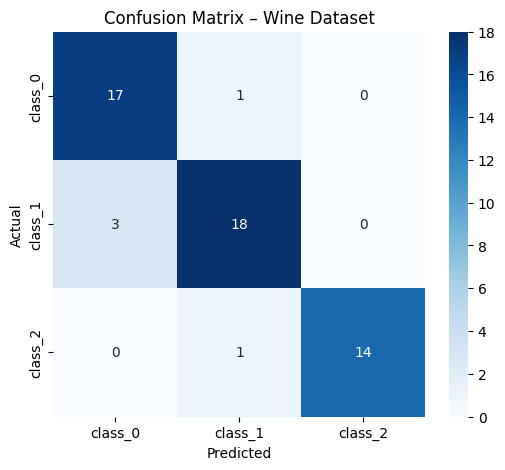

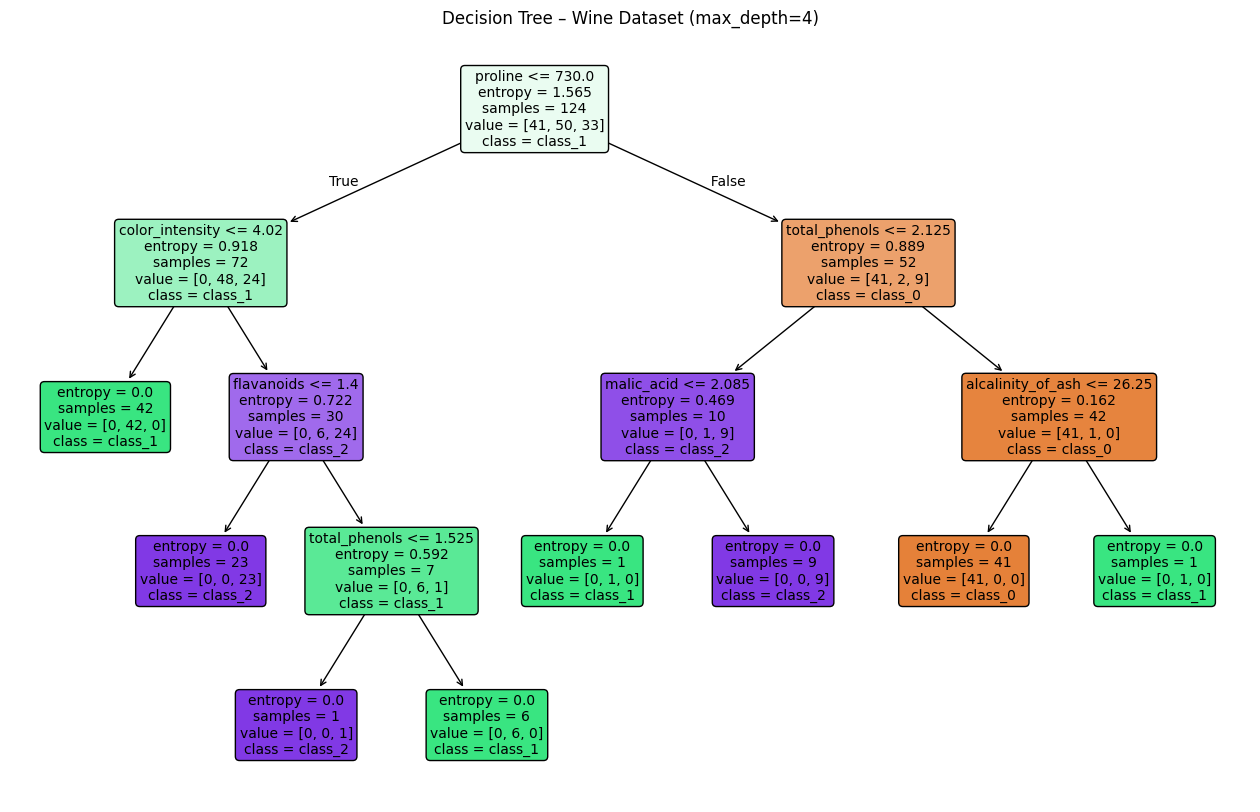

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

# Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# Train model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Cross‑validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("5‑fold CV accuracy scores:", cv_scores)
print("Mean CV accuracy: {:.3f} ± {:.3f}".format(cv_scores.mean(), cv_scores.std()))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Wine Dataset')
plt.show()

# Visualize Tree
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=feature_names, class_names=class_names,
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree – Wine Dataset (max_depth=4)')
plt.show()


Decision Tree Classifier on Titanic Dataset

C:\Users\khans\AppData\Local\Temp\ipykernel_7188\2689523955.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\khans\AppData\Local\Temp\ipykernel_7188\2689523955.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Decision Tree Accuracy: 0.7877
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



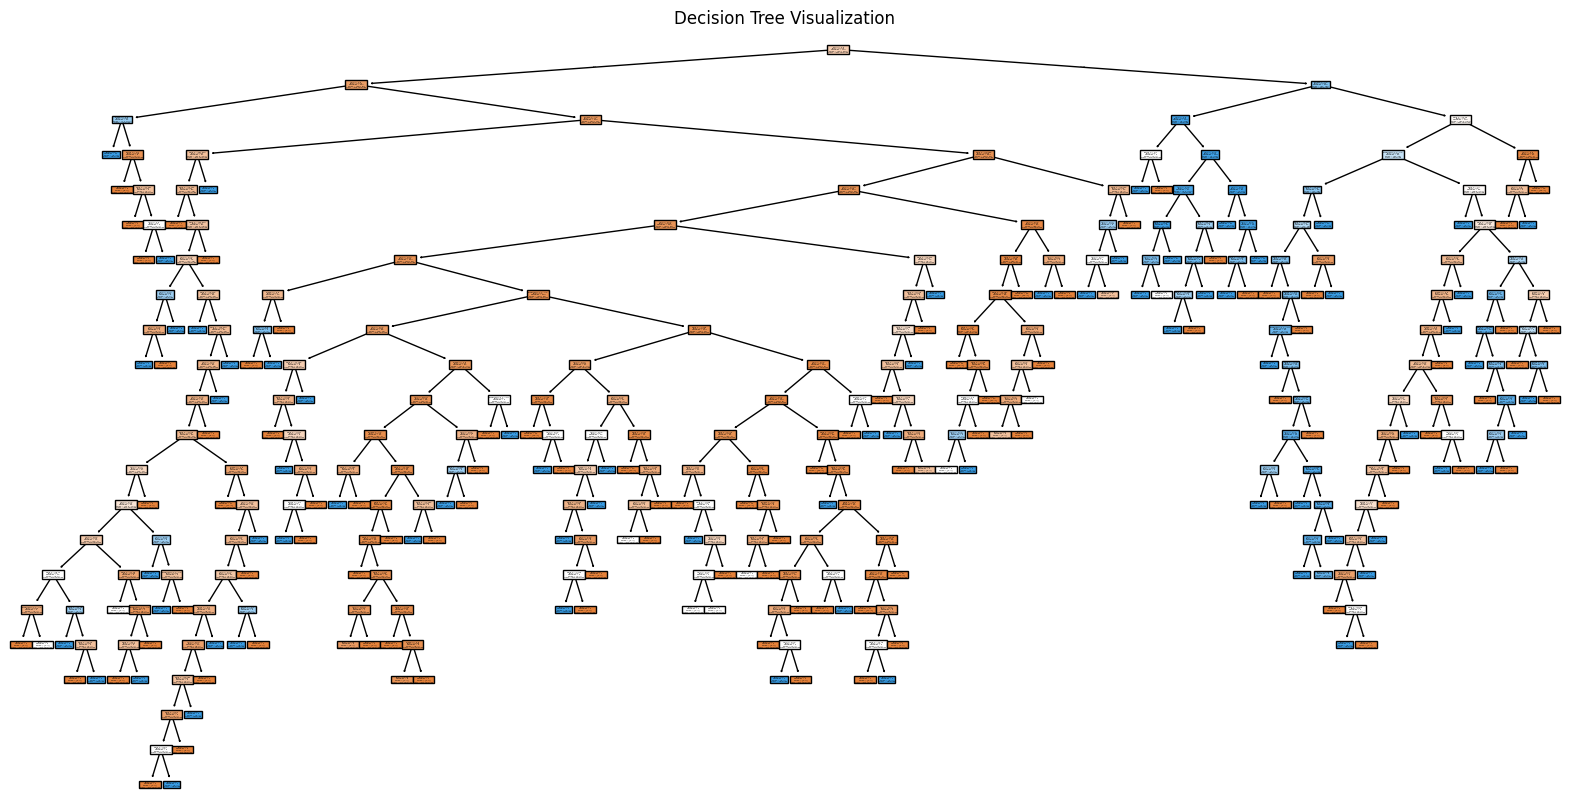

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset (adjust path to your local file or Kaggle dataset)
df = pd.read_csv('Titanic-Dataset.csv')

# Basic preprocessing: select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions and evaluation
y_pred = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


 Decision Tree classification script on Bike dataset

Decision Tree Accuracy: 0.8489
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      1093
           1       0.81      0.92      0.86      1085

    accuracy                           0.85      2178
   macro avg       0.86      0.85      0.85      2178
weighted avg       0.86      0.85      0.85      2178



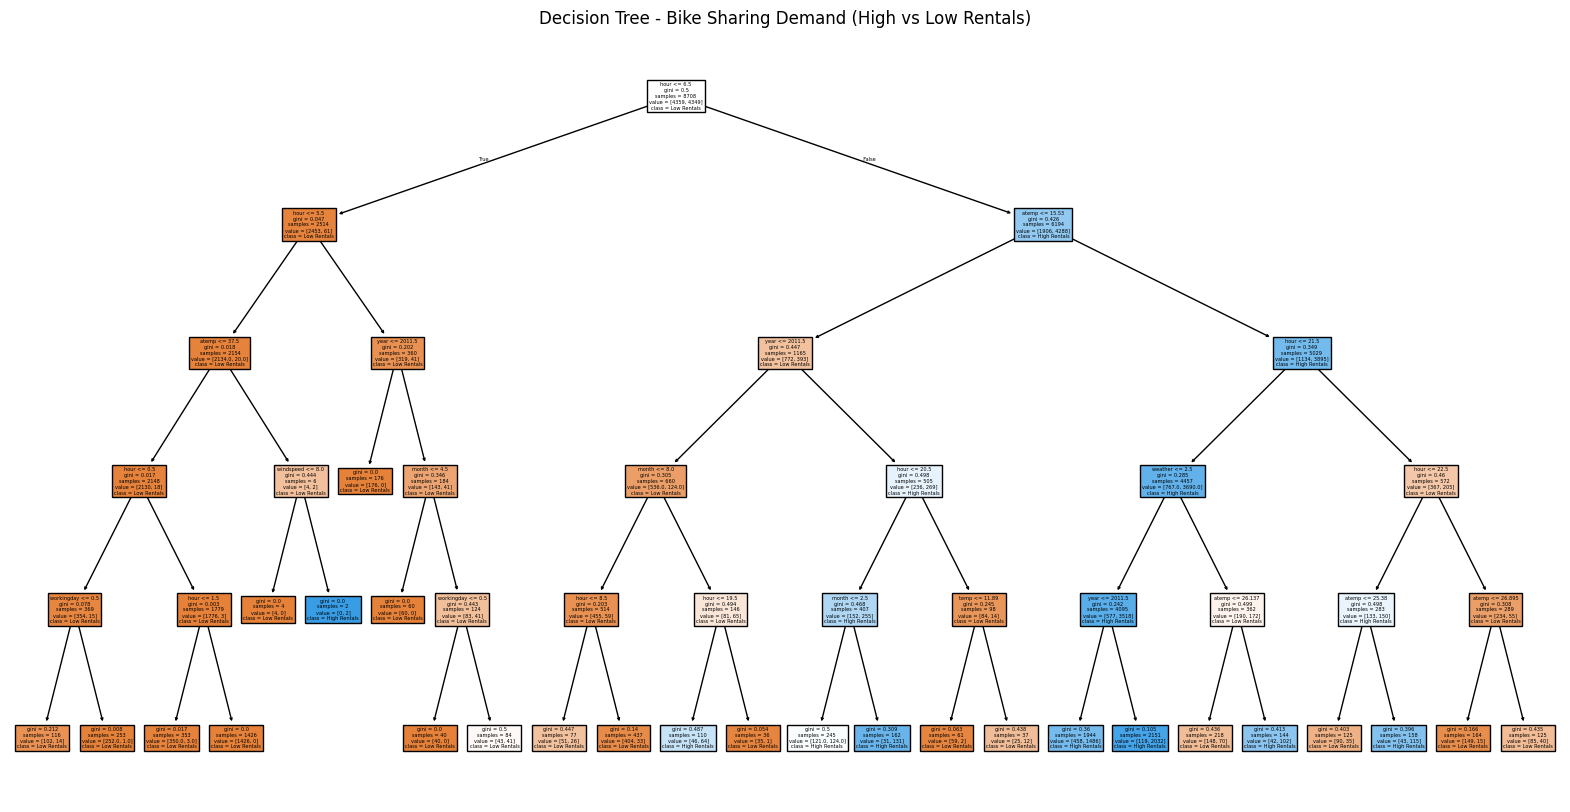

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load bike sharing data
df = pd.read_csv('train.csv')

# Quick preprocessing:
# Convert datetime to useful features
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Drop columns that won’t help or leak info
df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

# Define classification target: high rental if count > median, else low rental
threshold = df['count'].median()
df['high_rentals'] = (df['count'] > threshold).astype(int)

# Features and target
X = df.drop(['count', 'high_rentals'], axis=1)
y = df['high_rentals']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Low Rentals', 'High Rentals'], filled=True)
plt.title("Decision Tree - Bike Sharing Demand (High vs Low Rentals)")
plt.show()
